# Лабораторная работа по машинному обучению №2

ФИО: Лебедев Александр Сергеевич
Группа: 3821М1ПМвм

### Описание Датасета и задачи

#### Датасет
Датасет: [Link](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)
Датасет состоит из записей с информацией о продаваемых телефонах, их характеристики и стоймости. Стоймость поделена на диапозоны:
 - Низкая стоймость - 0
 - Средняя стоймость - 1
 - Высокая стоймость - 2
 - Очень высокая стйомость - 3

#### Доступные характеристики (признаки)
   - **battery_power**: Объем батареи (мАч)
    - **blue**: Наличине Bluetooth
    - **clock_speed**: Скорость выполнения инструкций микропроцессором
    - **dual_sim**: Наличие поддержки двух сим-карт
    - **fc**: Мегапиксели фронатльной камеры
    - **four_g**: Наличие 4G
    - **int_memory**: Объем внутреней памяти (гб)
    - **m_dep**: Глубина телефона (см)
    - **mobile_wt**: Вес телефона
    - **n_cores**: Число ядер процессора
    - **pc**: Мегапиксели основной камеры
    - **px_height**: Высота разрешения экрана
    - **px_width**: Ширина разрешения экрана
    - **ram**: Объем оперативной памяти (мб)
    - **sc_h**: Высота экрана телефона (см)
    - **sc_w**: Ширина экрана телефона (см)
    - **talk_time**: На сколько безпрерывного разговорного времени хватит одного заряда аккумулятора
    - **three_g**: Наличине 3G
    - **touch_screen**: Наличие сенсорного экрана
    - **wifi**: Наличие Wi-Fi


Цель: **Классификация диапозона стоймости мобильного телефона**
Задача: Обучить полносвязную неглубокую нейронную сеть (1-2 скрытых слоев) для достижения поставленной цели. Провести анализ зависимосчти качества сети от геперпараметра и числа нейронов.

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [3]:
data = pd.read_csv('data/train.csv')

In [4]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Разбиение датасета на обучающую и тестовую выборки с последующей нормировкой

In [7]:
X = data.drop('price_range', axis=1)
y = data['price_range']

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

In [8]:
X_test.shape

(400, 20)

### Найдем оптимальное значение параметра регуляризации alpha

In [73]:
def run_experiment(hidden_layer_sizes_set, alpha_set):
    columns = ['test_error', 'test_accuracy', 'train_error', 'train_accuracy', 'alpha', '1st_layer_size',
               '2nd_layer_size']

    results = pd.DataFrame(columns=columns)

    for alpha in alpha_set:
        for hidden_layer_sizes in hidden_layer_sizes_set:
            mlp_model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, solver='lbfgs', alpha=alpha,
                                      max_iter=10000,
                                      activation='logistic', random_state=100, verbose=False)
            mlp_model.fit(X_train, y_train)

            y_train_pred = mlp_model.predict(X_train)
            y_test_pred = mlp_model.predict(X_test)

            metrics = pd.DataFrame([[np.mean(y_test != y_test_pred),
                                     accuracy_score(y_test, y_test_pred),
                                     np.mean(y_train != y_train_pred),
                                     accuracy_score(y_train, y_train_pred),
                                     alpha,
                                     hidden_layer_sizes[0],
                                     hidden_layer_sizes[1] if len(hidden_layer_sizes) > 1 else 0]], columns=columns)

            results = pd.concat([results, metrics], ignore_index=True)

    return results

#### Проанализируем полученные результаты для разных значений параметра alpha

In [74]:
alpha_set = np.logspace(-3, 2, 21)
alpha_experiment = run_experiment([(100,)], alpha_set)

In [75]:
alpha_experiment

,test_error,test_accuracy,train_error,train_accuracy,alpha,1st_layer_size,2nd_layer_size
0,0.0550,0.9450,0.000000,1.000000,0.001000,100,0
1,0.0450,0.9550,0.000000,1.000000,0.001778,100,0
2,0.0500,0.9500,0.000000,1.000000,0.003162,100,0
3,0.0550,0.9450,0.000000,1.000000,0.005623,100,0
4,0.0500,0.9500,0.000000,1.000000,0.010000,100,0
5,0.0525,0.9475,0.000000,1.000000,0.017783,100,0
6,0.0575,0.9425,0.000000,1.000000,0.031623,100,0
7,0.0525,0.9475,0.000000,1.000000,0.056234,100,0
8,0.0475,0.9525,0.000000,1.000000,0.100000,100,0
9,0.0275,0.9725,0.000000,1.000000,0.177828,100,0


In [80]:
def analyze_experiment_results(results, tuned_parameter):
    plt.semilogx(results.loc[:, tuned_parameter], results.train_error, 'b-o', label='train')
    plt.semilogx(results.loc[:, tuned_parameter], results.test_error, 'r-o', label='test')
    plt.xlim([results.loc[:, tuned_parameter].min(), results.loc[:, tuned_parameter].max()])
    plt.title(f'Error / {tuned_parameter}')
    plt.xlabel(tuned_parameter)
    plt.ylabel(tuned_parameter)
    plt.legend()
    plt.show()

    plt.semilogx(results.loc[:, tuned_parameter], results.train_accuracy, 'r-o', label='train')
    plt.semilogx(results.loc[:, tuned_parameter], results.test_accuracy, 'b-o', label='test')
    plt.xlim([results.loc[:, tuned_parameter].min(), results.loc[:, tuned_parameter].max()])
    plt.title('Accuracy / alpha')
    plt.xlabel('alpha')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

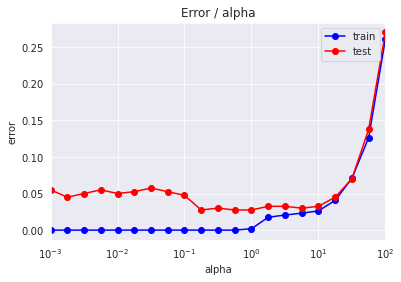

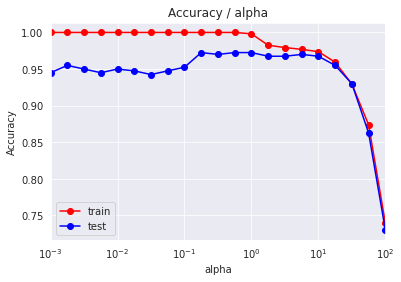

In [81]:
analyze_experiment_results(alpha_experiment, 'alpha')

In [82]:
print(f"Максимальная точность на тестовой выборке : {alpha_experiment.test_accuracy.max():.2f}")

Максимальная точность на тестовой выборке : 0.97


In [83]:
optimal_alpha = alpha_experiment.loc[alpha_experiment.test_accuracy.idxmax(), 'alpha']

In [84]:
print(f"Оптимальное значение параметра alpha: {optimal_alpha:.5f}")

Оптимальное значение параметра alpha: 0.17783


Восоздадим классификатор с оптимальным параметром регуляризцаии alpha

In [87]:
def train_and_analyze_model(alpha, hidden_layers_sizes):
    mlp_model = MLPClassifier(hidden_layer_sizes=hidden_layers_sizes, solver='lbfgs', alpha=alpha,
                              max_iter=10000,
                              activation='logistic', random_state=100, verbose=False)
    mlp_model.fit(X_train, y_train)

    y_test_pred = mlp_model.predict(X_test)

    print(classification_report(y_test, y_test_pred))

    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        90
           1       0.98      0.95      0.97       108
           2       0.96      0.99      0.98       101
           3       0.99      0.97      0.98       101

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



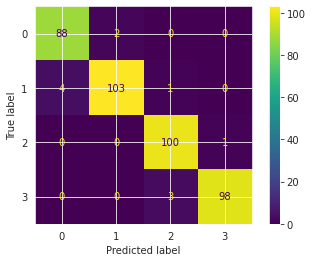

In [88]:
train_and_analyze_model(optimal_alpha, (100,))

### Проведем эксперемент над количеством нейронов

In [92]:
hidden_layer_size = np.arange(1, 500, 20)
hlayer1_experiment = run_experiment([(x,) for x in hidden_layer_size], [optimal_alpha])

In [103]:
hlayer1_experiment

,test_error,test_accuracy,train_error,train_accuracy,alpha,1st_layer_size,2nd_layer_size
0,0.0500,0.9500,0.045,0.955,0.177828,1,0
1,0.0250,0.9750,0.000,1.000,0.177828,21,0
2,0.0375,0.9625,0.000,1.000,0.177828,41,0
3,0.0300,0.9700,0.000,1.000,0.177828,61,0
4,0.0350,0.9650,0.000,1.000,0.177828,81,0
5,0.0250,0.9750,0.000,1.000,0.177828,101,0
6,0.0350,0.9650,0.000,1.000,0.177828,121,0
7,0.0225,0.9775,0.000,1.000,0.177828,141,0
8,0.0425,0.9575,0.000,1.000,0.177828,161,0
9,0.0525,0.9475,0.000,1.000,0.177828,181,0


In [94]:
print(f"Максимальная точность на тестовой выборке : {hlayer1_experiment.test_accuracy.max():.2f}")
optimal_hlayer1_size = hlayer1_experiment.loc[hlayer1_experiment.test_accuracy.idxmax(), '1st_layer_size']
print(f"Оптимальное число нейронов на первом скрытом слое: {optimal_hlayer1_size}")

Максимальная точность на тестовой выборке : 0.98
Оптимальное число нейронов на первом скрытом слое: 141


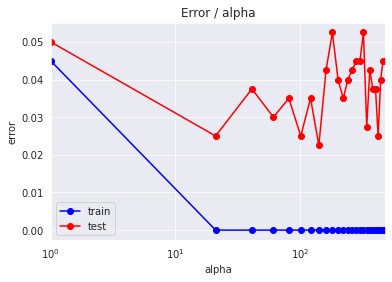

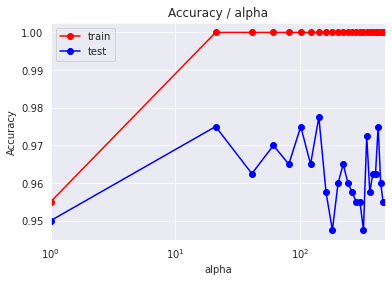

In [95]:
analyze_experiment_results(hlayer1_experiment, '1st_layer_size')

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        90
           1       0.98      0.96      0.97       108
           2       0.98      0.97      0.98       101
           3       0.98      0.99      0.99       101

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



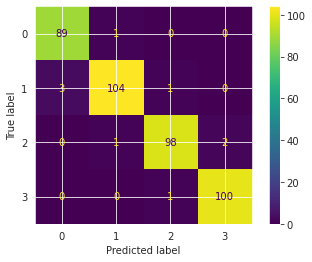

In [96]:
train_and_analyze_model(optimal_alpha, (optimal_hlayer1_size,))

Попробуем добавить второй скрытый слой и подобрать оптимальное число нейронов в нем

In [97]:
hlayer2_experiment = run_experiment([(optimal_hlayer1_size, x,) for x in hidden_layer_size], [optimal_alpha])

In [99]:
print(f"Максимальная точность на тестовой выборке : {hlayer2_experiment.test_accuracy.max():.2f}")
optimal_hlayer2_size = hlayer2_experiment.loc[hlayer2_experiment.test_accuracy.idxmax(), '2nd_layer_size']
print(f"Оптимальное число нейронов на втором скрытом слое: {optimal_hlayer2_size}")

Максимальная точность на тестовой выборке : 0.96
Оптимальное число нейронов на втором скрытом слое: 81


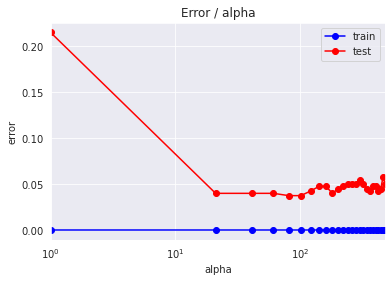

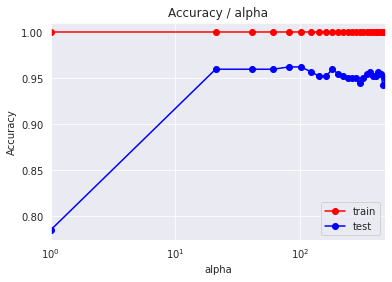

In [101]:
analyze_experiment_results(hlayer2_experiment, '2nd_layer_size')

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        90
           1       0.97      0.93      0.95       108
           2       0.94      0.98      0.96       101
           3       0.99      0.97      0.98       101

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



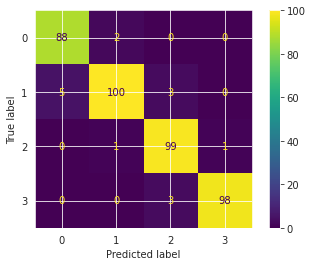

In [102]:
train_and_analyze_model(optimal_alpha, (optimal_hlayer1_size, optimal_hlayer2_size,))

## Вывод
Оптимальная точность и минимальная ошибка были достигнуты при следующих параметрах:
- **Число скрытых слоев**: 1
- **Число нейронов в первом скрытом слое**: 141
- **Гиперпараметр регуляризации**: 0.18

Метрики:
 - **Accuracy**: 0.98
 - **Error**: 2.25% (что лучше, чем у kNN: 4.75%)